# Forecasting

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_excel("Airlines+Data.xlsx")
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
df["Date"]=df["Month"]

In [5]:
df["log_passengers"]=np.log(df["Passengers"])
df.head()

,Month,Passengers,Date,log_passengers
0,1995-01-01,112,1995-01-01,4.718499
1,1995-02-01,118,1995-02-01,4.770685
2,1995-03-01,132,1995-03-01,4.882802
3,1995-04-01,129,1995-04-01,4.859812
4,1995-05-01,121,1995-05-01,4.795791


In [6]:
df["Month"]=df["Month"].dt.strftime("%m")

In [7]:
df["t"]=range(1,len(df)+1)

In [8]:
df["t_square"]=np.square(df["t"])

In [9]:
df.head()

,Month,Passengers,Date,log_passengers,t,t_square
0,01,112,1995-01-01,4.718499,1,1
1,02,118,1995-02-01,4.770685,2,4
2,03,132,1995-03-01,4.882802,3,9
3,04,129,1995-04-01,4.859812,4,16
4,05,121,1995-05-01,4.795791,5,25


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month           96 non-null     object        
 1   Passengers      96 non-null     int64         
 2   Date            96 non-null     datetime64[ns]
 3   log_passengers  96 non-null     float64       
 4   t               96 non-null     int64         
 5   t_square        96 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 4.6+ KB


In [11]:
df=pd.get_dummies(df)

In [12]:
df.head()

,Passengers,Date,log_passengers,t,t_square,Month_01,Month_02,Month_03,Month_04,Month_05,Month_06,Month_07,Month_08,Month_09,Month_10,Month_11,Month_12
0,112,1995-01-01,4.718499,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,118,1995-02-01,4.770685,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,132,1995-03-01,4.882802,3,9,0,0,1,0,0,0,0,0,0,0,0,0
3,129,1995-04-01,4.859812,4,16,0,0,0,1,0,0,0,0,0,0,0,0
4,121,1995-05-01,4.795791,5,25,0,0,0,0,1,0,0,0,0,0,0,0


In [13]:
df.rename(columns={"Month_01":"Jan","Month_02":"Feb","Month_03":"Mar","Month_04":"Apr","Month_05":"May",
               "Month_06":"Jun","Month_07":"Jul","Month_08":"Aug","Month_09":"Sep","Month_10":"Oct",
               "Month_11":"Nov","Month_12":"Dec"},inplace=True)
df.head()

,Passengers,Date,log_passengers,t,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,112,1995-01-01,4.718499,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,118,1995-02-01,4.770685,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,132,1995-03-01,4.882802,3,9,0,0,1,0,0,0,0,0,0,0,0,0
3,129,1995-04-01,4.859812,4,16,0,0,0,1,0,0,0,0,0,0,0,0
4,121,1995-05-01,4.795791,5,25,0,0,0,0,1,0,0,0,0,0,0,0


In [14]:
df.tail()

,Passengers,Date,log_passengers,t,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
91,405,2002-08-01,6.003887,92,8464,0,0,0,0,0,0,0,1,0,0,0,0
92,355,2002-09-01,5.872118,93,8649,0,0,0,0,0,0,0,0,1,0,0,0
93,306,2002-10-01,5.723585,94,8836,0,0,0,0,0,0,0,0,0,1,0,0
94,271,2002-11-01,5.602119,95,9025,0,0,0,0,0,0,0,0,0,0,1,0
95,306,2002-12-01,5.723585,96,9216,0,0,0,0,0,0,0,0,0,0,0,1


In [15]:
len(df)

96

In [16]:
df.tail()

,Passengers,Date,log_passengers,t,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
91,405,2002-08-01,6.003887,92,8464,0,0,0,0,0,0,0,1,0,0,0,0
92,355,2002-09-01,5.872118,93,8649,0,0,0,0,0,0,0,0,1,0,0,0
93,306,2002-10-01,5.723585,94,8836,0,0,0,0,0,0,0,0,0,1,0,0
94,271,2002-11-01,5.602119,95,9025,0,0,0,0,0,0,0,0,0,0,1,0
95,306,2002-12-01,5.723585,96,9216,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
df.shape

(96, 17)

In [18]:
# set the Month column as the index

df.set_index("Date",inplace=True)
df.head()

,Passengers,log_passengers,t,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Date,,,,,,,,,,,,,,,,
1995-01-01,112,4.718499,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1995-02-01,118,4.770685,2,4,0,1,0,0,0,0,0,0,0,0,0,0
1995-03-01,132,4.882802,3,9,0,0,1,0,0,0,0,0,0,0,0,0
1995-04-01,129,4.859812,4,16,0,0,0,1,0,0,0,0,0,0,0,0
1995-05-01,121,4.795791,5,25,0,0,0,0,1,0,0,0,0,0,0,0


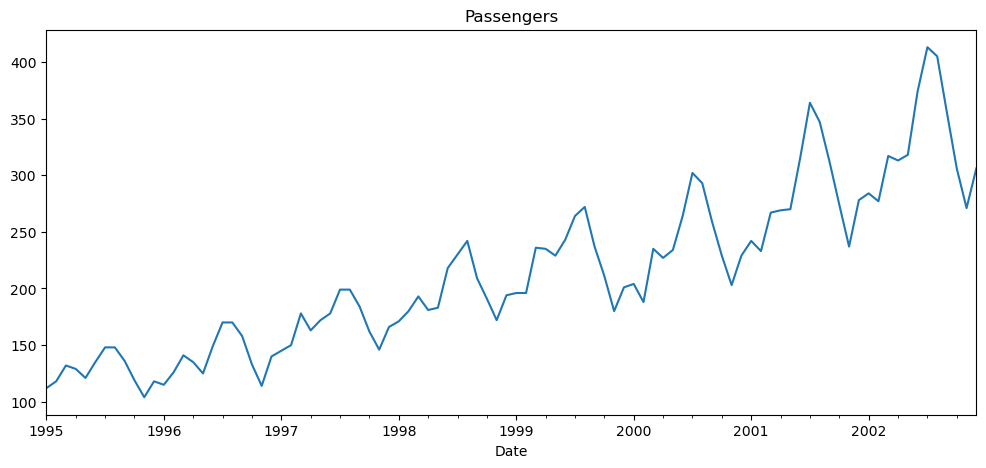

In [19]:
# plot the timeseries
df["Passengers"].plot(figsize=(12,5),title="Passengers");

In [20]:
# create a pivot table with year as the index and month as the columns and Passengers as the values 

df_pivot=df.pivot_table(values="Passengers",index=df.index.year,columns=df.index.month)
df_pivot

Date,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
1995,112,118,132,129,121,135,148,148,136,119,104,118
1996,115,126,141,135,125,149,170,170,158,133,114,140
1997,145,150,178,163,172,178,199,199,184,162,146,166
1998,171,180,193,181,183,218,230,242,209,191,172,194
1999,196,196,236,235,229,243,264,272,237,211,180,201
2000,204,188,235,227,234,264,302,293,259,229,203,229
2001,242,233,267,269,270,315,364,347,312,274,237,278
2002,284,277,317,313,318,374,413,405,355,306,271,306


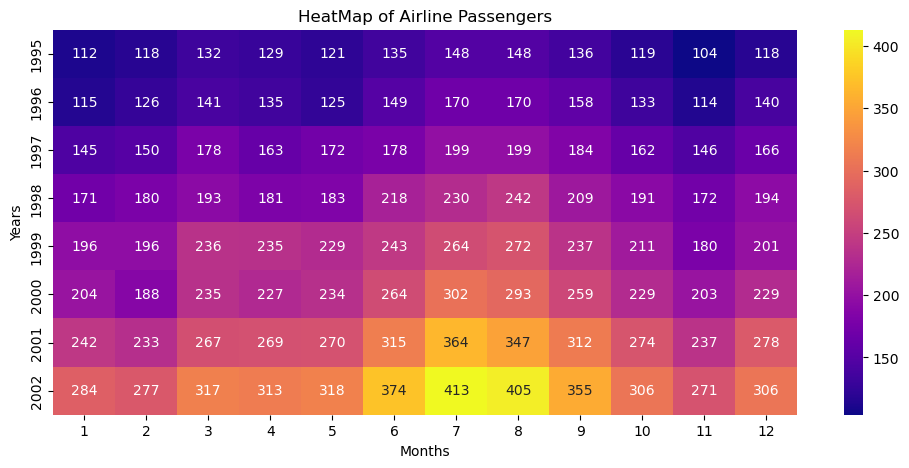

In [21]:
# visualize the pivot table as a heatmap

plt.figure(figsize=(12,5))
sns.heatmap(df_pivot,annot=True,cmap="plasma",fmt="g")
plt.title("HeatMap of Airline Passengers")
plt.xlabel("Months")
plt.ylabel("Years");

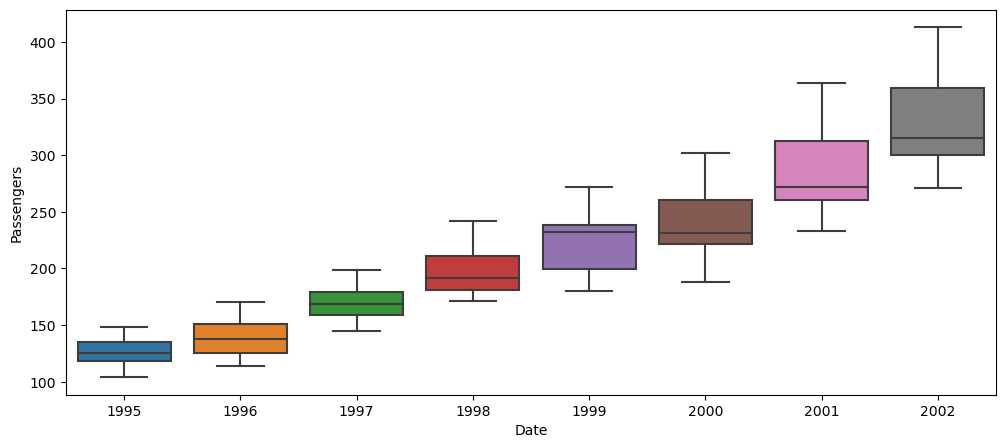

In [22]:
# boxplot of Airline Passengers for evry year 
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x=df.index.year,y="Passengers");

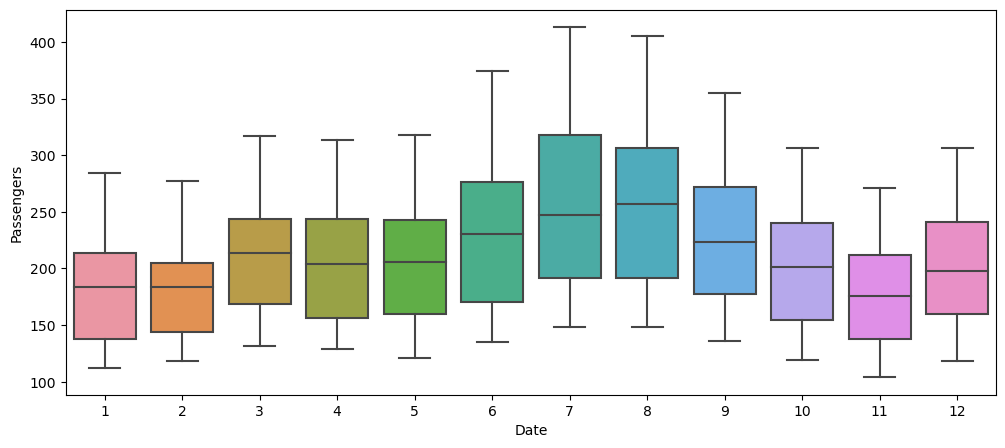

In [23]:
# boxplot of Airline Passengers for evry month 
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x=df.index.month,y="Passengers");

## Train Test Split of the Time Series Data

In [24]:
train=df.head(len(df)-12)
test=df.tail(12)

In [25]:
train.head()

,Passengers,log_passengers,t,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Date,,,,,,,,,,,,,,,,
1995-01-01,112,4.718499,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1995-02-01,118,4.770685,2,4,0,1,0,0,0,0,0,0,0,0,0,0
1995-03-01,132,4.882802,3,9,0,0,1,0,0,0,0,0,0,0,0,0
1995-04-01,129,4.859812,4,16,0,0,0,1,0,0,0,0,0,0,0,0
1995-05-01,121,4.795791,5,25,0,0,0,0,1,0,0,0,0,0,0,0


In [26]:
train.tail()

,Passengers,log_passengers,t,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Date,,,,,,,,,,,,,,,,
2001-08-01,347,5.849325,80,6400,0,0,0,0,0,0,0,1,0,0,0,0
2001-09-01,312,5.743003,81,6561,0,0,0,0,0,0,0,0,1,0,0,0
2001-10-01,274,5.613128,82,6724,0,0,0,0,0,0,0,0,0,1,0,0
2001-11-01,237,5.468060,83,6889,0,0,0,0,0,0,0,0,0,0,1,0
2001-12-01,278,5.627621,84,7056,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
test

,Passengers,log_passengers,t,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Date,,,,,,,,,,,,,,,,
2002-01-01,284,5.648974,85,7225,1,0,0,0,0,0,0,0,0,0,0,0
2002-02-01,277,5.624018,86,7396,0,1,0,0,0,0,0,0,0,0,0,0
2002-03-01,317,5.758902,87,7569,0,0,1,0,0,0,0,0,0,0,0,0
2002-04-01,313,5.746203,88,7744,0,0,0,1,0,0,0,0,0,0,0,0
2002-05-01,318,5.762051,89,7921,0,0,0,0,1,0,0,0,0,0,0,0
2002-06-01,374,5.924256,90,8100,0,0,0,0,0,1,0,0,0,0,0,0
2002-07-01,413,6.023448,91,8281,0,0,0,0,0,0,1,0,0,0,0,0
2002-08-01,405,6.003887,92,8464,0,0,0,0,0,0,0,1,0,0,0,0
2002-09-01,355,5.872118,93,8649,0,0,0,0,0,0,0,0,1,0,0,0


In [28]:
train.shape,test.shape

((84, 16), (12, 16))

## Analyzing Forecasting Models RMSE Values

## Linear Regression

In [29]:
from statsmodels.formula.api import ols 
from statsmodels.tools.eval_measures import rmse

In [30]:
model=ols("Passengers ~ t",data=train).fit()

In [31]:
pred_lin=model.predict(test["t"])
rmse_lin=rmse(test["Passengers"],pred_lin)
print( "RMSE of Linear Model : ",rmse_lin)

RMSE of Linear Model :  53.199236534802715


## Exponential Model

In [32]:
model=ols("log_passengers ~ t",data=train).fit()

In [33]:
pred_log=model.predict(test["t"])
rmse_log=rmse(test["Passengers"],np.exp(pred_log))
print( "RMSE of Exponential Model : ",rmse_log) 

RMSE of Exponential Model :  46.0573611031562


## Quadratic Model

In [34]:
model=ols("Passengers ~ t+t_square",data=train).fit()

In [35]:
pred_quad=model.predict(test[["t","t_square"]])
rmse_quad=rmse(test["Passengers"],pred_quad)
print( "RMSE of Quadratic Model : ",rmse_quad)

RMSE of Quadratic Model :  48.051888979330975


## Additive Seasonality Model

In [36]:
model=ols("Passengers ~ Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec",
          data=train).fit()

In [37]:
pred_add=model.predict(test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]])
rmse_add=rmse(test["Passengers"],pred_add)
print( "RMSE of Additive Seasonality Model : ",rmse_add)

RMSE of Additive Seasonality Model :  132.8197848142182


## Quadratic Model with Additive Seasonality

In [38]:
model=ols("Passengers ~ t + t_square + Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec",
          data=train).fit()

In [39]:
pred_quad_add=model.predict(test[["t","t_square","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]])
rmse_quad_add=rmse(test["Passengers"],pred_quad_add)
print( "RMSE of Quadratic Model with Additive Seasonality : ",rmse_quad_add)

RMSE of Quadratic Model with Additive Seasonality :  26.360817612100657


## Multiplicative Seasonality Model 

In [40]:
model=ols("log_passengers ~ Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec",
          data=train).fit()

In [41]:
pred_mul=model.predict(test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]])
rmse_mul=rmse(test["Passengers"],np.exp(pred_mul))
print( "RMSE of Multiplicative Model : ",rmse_mul)

RMSE of Multiplicative Model :  140.06320204708655


## Multiplicative Seasonality with Additive Trend

In [42]:
model=ols("log_passengers ~ t + Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec",
          data=train).fit()

In [43]:
pred_mul_add=model.predict(test[["t","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]])
rmse_mul_add=rmse(test["Passengers"],np.exp(pred_mul_add))
print( "RMSE of Multiplicative Seasonality with Additive Trend : ",rmse_mul_add)

RMSE of Multiplicative Seasonality with Additive Trend :  10.519172544323308


## Model Comparsion

In [44]:
# compare the RMSE of all the models in a single datframe

rmse_df=pd.DataFrame({"Model": ["Linear",
                                "Exponential",
                               "Quadratic",
                               "Additive Seasonality",
                               "Quadratic with Additive Seasonality",
                               "Multiplicative Seasonality",
                               "Multiplicative Seasonality with Additive Trend"],
                     "RMSE": [rmse_lin,rmse_log,rmse_quad,rmse_add,rmse_quad_add,
                             rmse_mul,rmse_mul_add]})
rmse_df

,Model,RMSE
0,Linear,53.199237
1,Exponential,46.057361
2,Quadratic,48.051889
3,Additive Seasonality,132.819785
4,Quadratic with Additive Seasonality,26.360818
5,Multiplicative Seasonality,140.063202
6,Multiplicative Seasonality with Additive Trend,10.519173


In [45]:
# sort the dataframe by RMSE in descending order

rmse_df.sort_values(by="RMSE",ascending=True)

,Model,RMSE
6,Multiplicative Seasonality with Additive Trend,10.519173
4,Quadratic with Additive Seasonality,26.360818
1,Exponential,46.057361
2,Quadratic,48.051889
0,Linear,53.199237
3,Additive Seasonality,132.819785
5,Multiplicative Seasonality,140.063202


## Building Model with the Best Forecasting Model with resepect to RMSE Value

In [46]:
# train the selected best model ( Multiplicative Seasonality with Additive Trend ) on the entire dataset 
model=ols("log_passengers ~ t + Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec",
          data=df).fit()

In [47]:
forecasted_passengers=model.predict(df)
np.exp(forecasted_passengers)

Date
1995-01-01    109.176148
1995-02-01    110.331245
1995-03-01    127.315234
1995-04-01    123.200587
1995-05-01    122.399578
                 ...    
2002-08-01    394.784174
2002-09-01    353.576683
2002-10-01    310.439400
2002-11-01    272.472660
2002-12-01    312.337712
Length: 96, dtype: float64

In [48]:
df["forecasted_passengers"]=np.exp(forecasted_passengers)
df

,Passengers,log_passengers,t,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,forecasted_passengers
Date,,,,,,,,,,,,,,,,,
1995-01-01,112,4.718499,1,1,1,0,0,0,0,0,0,0,0,0,0,0,109.176148
1995-02-01,118,4.770685,2,4,0,1,0,0,0,0,0,0,0,0,0,0,110.331245
1995-03-01,132,4.882802,3,9,0,0,1,0,0,0,0,0,0,0,0,0,127.315234
1995-04-01,129,4.859812,4,16,0,0,0,1,0,0,0,0,0,0,0,0,123.200587
1995-05-01,121,4.795791,5,25,0,0,0,0,1,0,0,0,0,0,0,0,122.399578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,405,6.003887,92,8464,0,0,0,0,0,0,0,1,0,0,0,0,394.784174
2002-09-01,355,5.872118,93,8649,0,0,0,0,0,0,0,0,1,0,0,0,353.576683
2002-10-01,306,5.723585,94,8836,0,0,0,0,0,0,0,0,0,1,0,0,310.439400


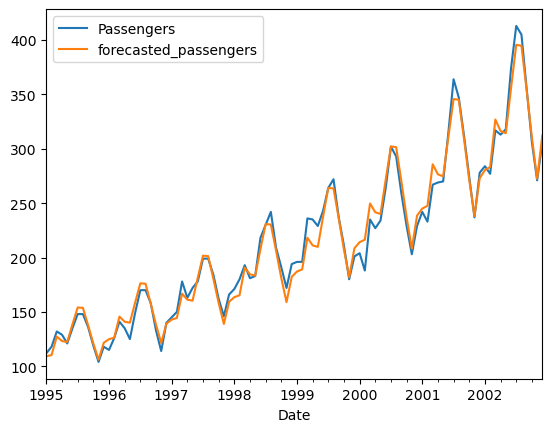

In [49]:
# plot the time series values for passengers and forecasted_passengers

df["Passengers"].plot(legend=True)
df["forecasted_passengers"].plot(legend=True);

## Forecasting through ARIMA MODEL

In [50]:
df=pd.read_excel("Airlines+Data.xlsx",index_col="Month")
df.head() 

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


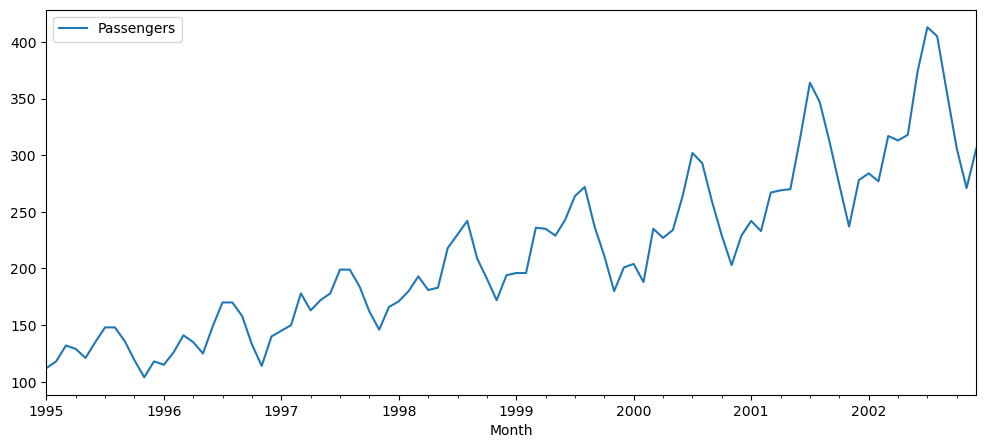

In [51]:
# visualize the data 
df.plot(figsize=(12,5));


In [52]:
len(df)

96

In [53]:
# split the data into train and test data with the last 12 months as test data

train=df.iloc[:len(df)-12]
test=df.iloc[len(df)-12:]

In [54]:
train.shape,test.shape

((84, 1), (12, 1))

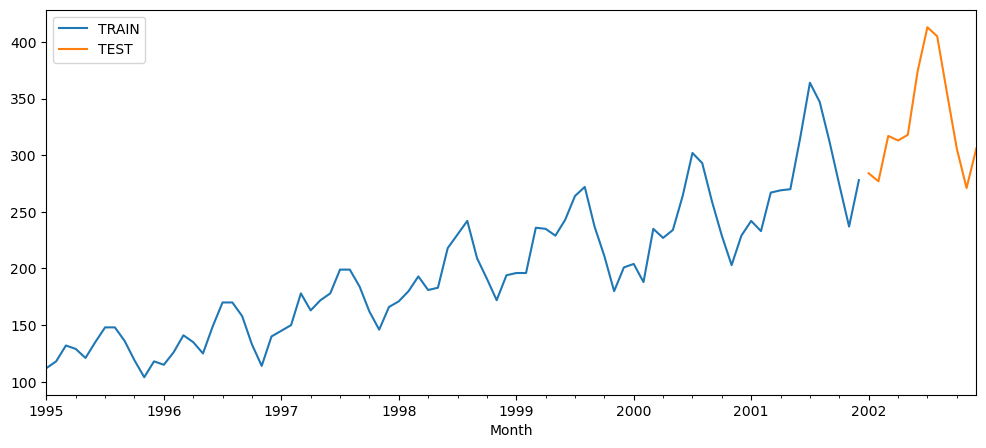

In [55]:
# plot the train and test data in different colors and labels 
train["Passengers"].plot(legend=True,label="TRAIN",figsize=(12,5))
test["Passengers"].plot(legend=True,label="TEST",figsize=(12,5));

In [56]:
# arima model parameters tuning with auto_arima
from pmdarima import auto_arima

In [57]:
auto_arima_model=auto_arima(train["Passengers"],
                            start_p=0,
                            start_q=0,
                            max_p=5,
                            max_q=5,
                            d=1,
                            max_d=5,
                            start_P=0,
                            D=1,
                            max_P=5,
                            max_D=5,
                            m=12,
                            start_Q=0,
                            max_Q=5,
                            seasonal=True,trace=True,
                            error_action="ignore",suppress_warnings=True,
                            stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=536.198, Time=0.01 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=533.081, Time=0.04 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=534.832, Time=0.12 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=536.048, Time=0.26 sec
 ARIMA(0,1,0)(0,1,4)[12]             : AIC=537.692, Time=0.43 sec
 ARIMA(0,1,0)(0,1,5)[12]             : AIC=inf, Time=2.25 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=533.128, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=534.950, Time=0.07 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.64 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=inf, Time=0.97 sec
 ARIMA(0,1,0)(1,1,4)[12]             : AIC=inf, Time=1.59 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=534.789, Time=0.09 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=inf, Time=1.57 sec
 ARIMA(0,1,0)(3,1,0)[12]             :

In [58]:
auto_arima_model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (0, 1, 3),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (1, 1, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

In [59]:
# import the SARIMAX model

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [60]:
# fit the SARIMAX model with the identified best parameters and forecast the test data

model=SARIMAX(train["Passengers"],order=(0,1,3),seasonal_order=(1,1,0,12))
results=model.fit()
forecast=results.predict(start=len(train),
    end=len(train)+len(test)-1).rename("SARIMA Forecast")
forecast

C:\Users\Sachin Ganapathy\Anaconda3\envs\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sachin Ganapathy\Anaconda3\envs\arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2002-01-01    285.244292
2002-02-01    278.463824
2002-03-01    312.094633
2002-04-01    311.765493
2002-05-01    314.162977
2002-06-01    355.669267
2002-07-01    402.107213
2002-08-01    386.970525
2002-09-01    352.203439
2002-10-01    316.066751
2002-11-01    281.628805
2002-12-01    319.135095
Freq: MS, Name: SARIMA Forecast, dtype: float64

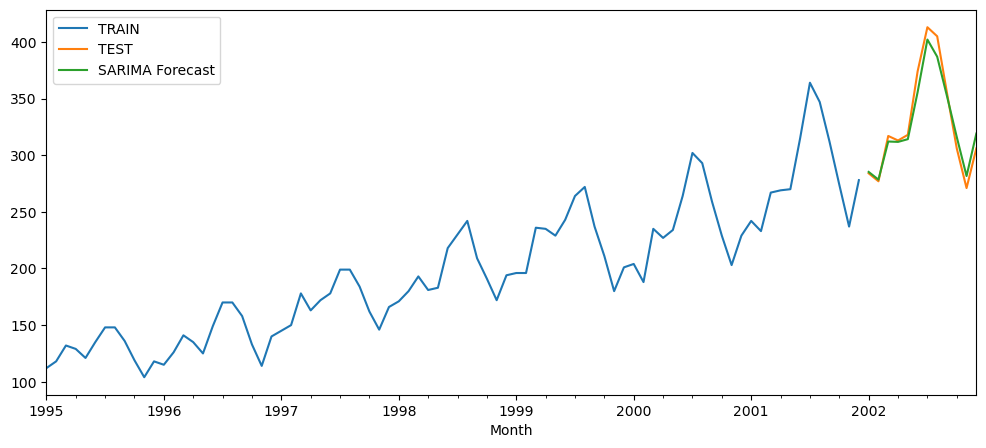

In [61]:
# plot the train ,test and forecast data 

train["Passengers"].plot(legend=True,label="TRAIN",figsize=(12,5))
test["Passengers"].plot(legend=True,label="TEST",figsize=(12,5))
forecast.plot(legend=True,figsize=(12,5));

In [62]:
# calcualte the RMSE for the SARIMA model
rmse_sarimax=rmse(test["Passengers"],forecast)
rmse_sarimax

10.076347856816948